<a href="https://colab.research.google.com/github/tathatj/Image-Classifier/blob/master/TATHAGATA_GHOSH_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of handwritten digits using MLN

# MNIST Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" title="MNIST dataset" align="center"/>



# Problem
Classify handwritten digits from 0 - 9. <br>
Each image is 28x28 pixels

<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" title="" align="center"/>


# Understanding the data

In [0]:
# MNIST data is present in the keras library. You may load it from there
from keras.datasets import mnist
def load_data():
    """
    Inputs:
        None
    Outputs:
        train_samples, train_labels, test_samples, test_labels: numpy arrays
    
    Load the train/test of mnist data into these variables
    """
    # YOUR CODE HERE
    (train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()

    return train_samples, train_labels, test_samples, test_labels 

train_samples, train_labels, test_samples, test_labels = load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
"""Test cases"""
assert train_samples.shape == (60000, 28, 28)
assert test_labels.shape == (10000,)
print('Test passed', '\U0001F44D')


Test passed 👍


### Shape of Data


In [0]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Range of Values

In [0]:
import numpy as np
np.amax(train_samples) # Max value

255

In [0]:
np.amin(train_samples) # Min Value

0

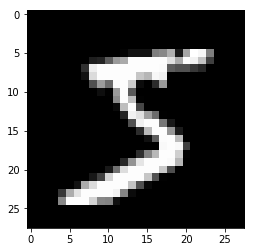

Label of image is 5


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

pixels = train_samples[0] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', train_labels[0])

# Data Preparation

### Normalize inputs to (0, 1)

In [0]:
def convert_dtype(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_float: numpy array, dtype of elements changed to 'float32'
    """
    # YOUR CODE HERE
    x_float = x.astype('float32')
    
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [0]:
"""Test cases"""
assert str(train_samples.dtype) == 'float32'
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:
def normalize(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_n: numpy array, elements normalized to be between (0, 1)
    """    
    # YOUR CODE HERE
    x_n = x/255.
    return x_n
    
train_samples = normalize(train_samples)
test_samples = normalize(test_samples) 


In [0]:
"""Test cases"""
assert np.isclose(np.amax(train_samples), 1)
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:
train_samples.shape

(60000, 28, 28)

In [0]:
def reshape(x):
    """
    We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras
    Inputs:
        x: numpy array of shape(samples, height, width)
    Outputs:
        x_r: numpy array of shape(samples, height, width, 1)
    """
    # YOUR CODE HERE
    x_r = x.reshape(x.shape[0], 28,28,1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [0]:
train_labels.shape

(60000,)

### Convert outputs to 1-hot vectors
\begin{equation*}
Eg: 5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
\end{equation*}

In [0]:
def oneHot(y, Ny):
    """
    Inputs:
        y: numpy array if shape (samples, ) with class labels
        Ny: number of classes
    Outputs:
        y_oh: numpy array of shape (samples, Ny) of one hot vectors
    """
    # YOUR CODE HERE
    from tensorflow.keras.utils import to_categorical

    y_oh = to_categorical(y,Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [0]:
"""Test cases"""
assert train_labels.shape[1] == 10
print('Test passed', '\U0001F44D')


Test passed 👍


## Create a convolutional neural network model
You may design whatever cnn model you like. But following are hints to get started.<br>
Make the following layers:
1. cnn layer with kernel_size = (5, 5) and 32 kernels
2. cnn layer with kernel_size = (3, 3) and 20 kernels
3. Maxpooling layer of size (2, 2)
4. Flatten layer
5. Dense layer of appropriate size
6. Output layer of appropriate size

In [0]:
def create_model():
    """
    Inputs:
        None
    Outputs:
        model: compiled keras model
    """
    # YOUR CODE HERE
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    from tensorflow.keras import optimizers

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])




    return model

model = create_model()

W0623 18:02:17.159910 140594691581824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 18:02:17.196750 140594691581824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 18:02:17.205101 140594691581824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 18:02:17.244240 140594691581824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0623 18:02:17.287856 140594691581824 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=2, batch_size=200)
# Use 10% of samples for validation, validation_split is the relevant parameter


W0623 18:02:17.437232 140594691581824 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 18:02:17.494397 140594691581824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 10s 181us/step - loss: 1.0884 - acc: 0.6917 - val_loss: 0.3125 - val_acc: 0.9117
Epoch 2/2
54000/54000 [==============================] - 3s 56us/step - loss: 0.3339 - acc: 0.9019 - val_loss: 0.2289 - val_acc: 0.9342


In [0]:
def predict(x):
    """
    Inputs:
        x: input samples
        model: keras model
    Outputs:
        y: predicted labels
    """
    # YOUR CODE HERE
    y = model.predict(x)
    return y

In [0]:
def oneHot_tolabel(y):
    """
    Inputs:
        y: numpy array of shape (samples, Ny)
    Outputs:
        y_b: numpy array of shape (samples,) where one hot encoding is converted back to class labels
    """
    # YOUR CODE HERE
     
    y_b=np.argmax(y, axis=1)
    return y_b
    

In [0]:
def create_confusion_matrix(true_labels, predicted_labels):
    """
    Inputs:
        true_labels: numpy array of shape (samples, ) with true_labels
        test_labels: numpy array of shape(samples, ) with test_labels
    Outputs:
        cm: numpy array of shape (Ny, Ny), confusion matrix. Ny -> number of unique classes in y
    """
    # YOUR CODE HERE
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(true_labels, predicted_labels)

    return cm

In [0]:
predicted_labels_train = predict(train_samples)

In [0]:
print(predicted_labels_train.shape)

(60000, 10)


In [0]:
cm = create_confusion_matrix(oneHot_tolabel(train_labels), oneHot_tolabel(predict(train_samples)))

In [0]:
print(cm)

[[5672    1    8   18   10   51   59   17   79    8]
 [   0 6582   40   14    6   29   12   20   29   10]
 [  53   72 5141   87  110   15  157  119  174   30]
 [  33   50   83 5342    5  197   41  107  215   58]
 [   5   29   28    0 5426    2   83   30   32  207]
 [  60   52   19  171   49 4707  129   33  151   50]
 [  26   19   12    2   46   56 5721    4   31    1]
 [  26   52   56    7   67    8    1 5904   13  131]
 [  23  113   34  124   19   82   49   29 5301   77]
 [  31   40   16   73  183   23    1  249   63 5270]]


In [0]:
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(precision )
min=np.amin(precision)
print(min)

[0.95665374 0.93894437 0.94555821 0.9150394  0.91639926 0.91044487
 0.91492084 0.90663391 0.8707293  0.90208833]
0.8707293035479632


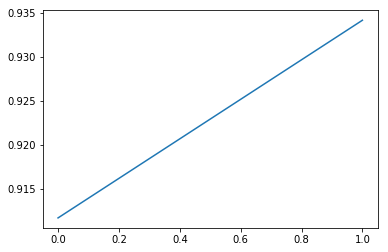

In [0]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])
plt.show()

In [0]:
def accuracy(x_test, y_test, model):
    """
    Inputs:
        x_test: test samples
        y_test : test labels
        model: keras model
    Ouputs:
        acc: float, accuracy of test data on model
    """
    # YOUR CODE HERE
    loss, acc = model.evaluate(x_test, y_test,verbose=0)
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

Test accuracy is,  92.05 %


In [0]:
### Advanced
1. Tune the hyperparameters to better the performance
2. Find the classes which are getting most confused from confusion matrix. Take out those samples. Plot them and see why they are getting confused.

In [0]:
def create_model():
    """
    Inputs:
        None
    Outputs:
        model: compiled keras model
    """
    # YOUR CODE HERE
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    from tensorflow.keras import optimizers

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    
    model.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])




    return model

model = create_model()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 2,435,210
Trainable params: 2,435,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_samples, train_labels, validation_split = 0.2, epochs=4, batch_size=200)


Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 6s 123us/step - loss: 1.1301 - acc: 0.7276 - val_loss: 0.3855 - val_acc: 0.8949
Epoch 2/4
48000/48000 [==============================] - 5s 114us/step - loss: 0.3589 - acc: 0.8967 - val_loss: 0.2936 - val_acc: 0.9198
Epoch 3/4
48000/48000 [==============================] - 5s 114us/step - loss: 0.2952 - acc: 0.9141 - val_loss: 0.2572 - val_acc: 0.9263
Epoch 4/4
48000/48000 [==============================] - 5s 114us/step - loss: 0.2604 - acc: 0.9235 - val_loss: 0.2368 - val_acc: 0.9308


In [0]:
print(cm)

[[5672    1    8   18   10   51   59   17   79    8]
 [   0 6582   40   14    6   29   12   20   29   10]
 [  53   72 5141   87  110   15  157  119  174   30]
 [  33   50   83 5342    5  197   41  107  215   58]
 [   5   29   28    0 5426    2   83   30   32  207]
 [  60   52   19  171   49 4707  129   33  151   50]
 [  26   19   12    2   46   56 5721    4   31    1]
 [  26   52   56    7   67    8    1 5904   13  131]
 [  23  113   34  124   19   82   49   29 5301   77]
 [  31   40   16   73  183   23    1  249   63 5270]]


In [0]:
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(precision )
min=np.amin(precision)
print(min)

[0.95665374 0.93894437 0.94555821 0.9150394  0.91639926 0.91044487
 0.91492084 0.90663391 0.8707293  0.90208833]
0.8707293035479632


In [0]:
train_samples.shape

(60000, 28, 28, 1)

In [0]:
tx=train_samples.reshape(train_samples.shape[0], 28,28)
tx.shape

(60000, 28, 28)

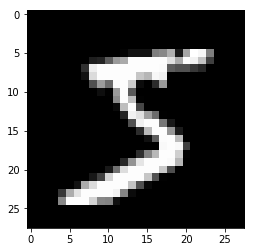

Label of image is 5


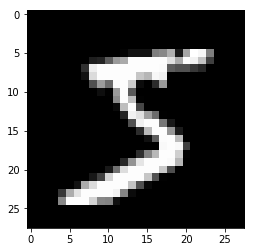

Label of image is 0


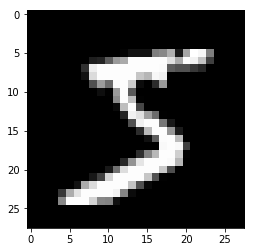

Label of image is 4


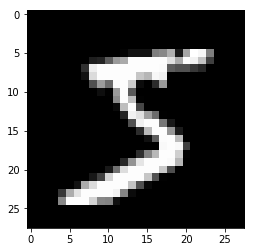

Label of image is 1


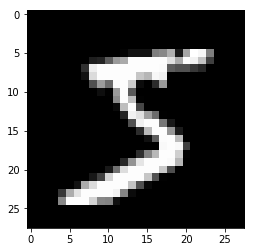

Label of image is 9


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(5):
  if oneHot_tolabel(predict(train_samples))[i]==8:
    pixels = tx[i] # Shape (28, 28)
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print('Label of image is', oneHot_tolabel(predict(train_samples))[i])
